# 6.1.1

In [73]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.linalg as sci

a, b = 1, 1.44
c = np.array([0.6, 1.3, 0, 1.2, 1.9])

def P_n(x, c):
    return np.sum([c[i] * x**i for i in range(c.shape[0])])

print (P_n(1, c))


def Trapezoidal(f, a, b, h=b-1):
    '''Вычисляет значение интеграла функции f(x) на отрезке [a, b] методом трапеций
    h - шаг
    Возвращает значение интеграла'''
    x = np.linspace(a, b, round((b - a) / h) + 1)
    res = (f(x[0], c) + f(x[-1], c)) / 2.
    res += np.sum(f(x[1:-1], c))
    return h * res 

def Simpson(f, a, b, h=b-a):
    '''Вычисляет значение интеграла функции f(x) на отрезке [a, b] методом Симпсона
    h - шаг
    Возвращает значение интеграла'''
    x = np.linspace(a, b, round((b - a) / h) + 1)
    res = f(x[0], c) + f(x[-1], c)
    res += 2 * np.sum(f(x[1:-1], c))
    res += 4 * np.sum(f((x[:-1]+x[1:]) / 2., c))
    return h / 6. * res

res_tr = Trapezoidal(P_n, a, b, b - a)
res_s = Simpson(P_n, a, b, b - a)
res_true = 12.835
print (res_tr, abs(res_tr - res_true))
print (res_s, abs(res_s - res_true))



h_tr = b - a
M2 = 288.908
while M2 * (b - a) * h_tr**2 / 12. >= 0.0001:
    h_tr /= 2.
h_tr



5.0
4.229463265279999 8.605536734720001
3.9249060458666656 8.910093954133336


0.0017187499999999998

In [74]:
h_s = b - a
M4 = 573.12
while M4 * (b - a) * h_s**4 / 2880. >= 0.0001:
    h_s /= 2.
h_s

0.10999999999999999

In [75]:
res_tr = Trapezoidal(P_n, a, b, h_tr)
res_s = Simpson(P_n, a, b, h_s)
print (res_tr, abs(res_tr - res_true))
print (res_s, abs(res_s - res_true))

3.924649595607798 8.910350404392203
3.924645948501666 8.910354051498334


# 6.2.1

In [76]:
c = np.array([1, 0.9, 0.8, 0.7, 0.8, 1, 0, 1], dtype=float)
a = 0
b = 1


def P_n(x, c):
    return np.sum([c[i] * x**i for i in range(c.shape[0])])

print (P_n(1, c))

I_analit = 1
print("Аналитическое значение интеграла: {}".format(I_analit))

6.199999999999999
Аналитическое значение интеграла: 1


In [77]:
In = Trapezoidal(P_n, a, b, (b - a)/2)
In

2.7132812499999996

In [78]:
In_1 = Trapezoidal(P_n, a, b, b-a)

rung = abs(In - In_1)/3

print("Погрешность по правилу Рунге: {}".format(rung))
print("Реальная абсолютная погрешность: {}".format(abs(I_analit - In)))

Погрешность по правилу Рунге: 0.2955729166666667
Реальная абсолютная погрешность: 1.7132812499999996


Формула трапеций дает точный результат только для многочленов первой степени, поскольку эта формула предполагает аппроксимацию прямыми отрезками

# 6.5.1

In [130]:
def simpson(f, left, right):
    return (right - left) / 6 * (f(left) + 4 * f((left + right) / 2) + f(right))

def f5(t):
    return sin(t**2)

a = 0 
x1 = 0
x2 = 2

In [131]:
def apply_fun_in_splits(f, n_splits, g, left, right):
    
    splits = np.linspace(left, right, n_splits + 1)
    
    results = list()
    for i in range(n_splits):
        results.append(f(g, splits[i], splits[i + 1]))
    
    return np.asarray(results)

def adapt_simpson(f, left, right, n_splits, min_diff):
    int_1 = np.sum(apply_fun_in_splits(simpson, n_splits, f, left, right))
    int_2 = np.sum(apply_fun_in_splits(simpson, n_splits * 2, f, left, right))
    
    if np.abs(int_1 - int_2) > min_diff:
        mid = (left + right) / 2
        return adapt_simpson(f, left, mid, n_splits * 2, min_diff) + adapt_simpson(f, mid, right, n_splits * 2, min_diff)
    else:
        return int_1

In [132]:
adapt_simpson(f5, 0, 1, 2, 1e-12)

0.310268301721957

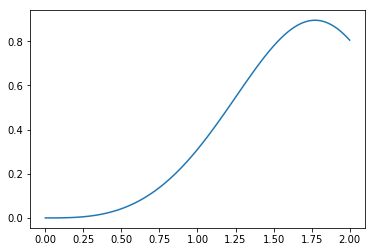

In [134]:
xs = np.linspace(x1, x2, 100)
y = np.asarray(list(map(lambda x: adapt_simpson(f5, a, x, 2, 1e-8), xs)))

import matplotlib.pyplot as plt

plt.plot(xs, y)

In [136]:
from sympy import Symbol, sin, integrate, sqrt, pi

x = Symbol('x')
t = Symbol('t')
f = sin(t**2)
analitical_int = integrate(f, (t, 0, x))
analitical_int

3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*x/sqrt(pi))*gamma(3/4)/(8*gamma(7/4))

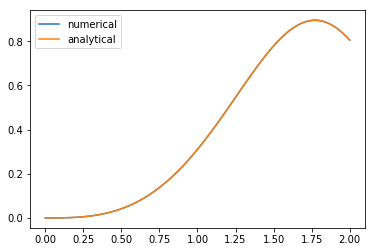

In [157]:
plt.plot(xs, y, label='numerical')
plt.plot(xs, list(map(lambda x: integrate(f, (t, 0, x)), xs)), '-', label='analytical')

plt.legend()



# 6.6.1

# 6.9.1